In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sisData = pd.read_csv('reporte_sismos_2019_2023.csv')

In [2]:
print(sisData)

         No      TiempodeOrigen  Latitud  Longitud  Profundidad  MAG  NST  NF  \
0        1    2019-01-01T02:25    14.762   -91.062          6.1  3.4   11  17   
1        2    2019-01-01T02:45    14.486   -91.773         67.6  3.3    5   9   
2        3    2019-01-01T03:19    14.135   -92.318         27.1  4.0   16  19   
3        4    2019-01-01T11:17    14.391   -91.578         82.6  4.6   21  31   
4        5    2019-01-01T15:27    14.301   -91.856         59.5  3.0    7   2   
...     ...                 ...      ...       ...          ...  ...  ...  ..   
19828  4625   2023-12-30T12:38    12.275   -89.103         11.1  4.0   21  32   
19829  4626   2023-12-30T19:27    13.896   -89.753          1.0  2.6    7  12   
19830  4627   2023-12-30T20:55    13.931   -91.441         38.3  2.7   25  28   
19831  4628   2023-12-31T01:10    12.965   -89.216         26.9  3.0   16  29   
19832  4629   2023-12-31T05:06    13.311   -89.905         26.4  2.4    8  15   

                 ZS Sensibl

In [3]:
def mostrar_cantidad_variables():
    print("Cantidad de sismos registrados en los últimos 5 años:", len(sisData))
    print("Nombres de las variables:")
    print(sisData.columns.tolist())

In [4]:
def sismos_por_anio():
    anio = int(input("Ingrese el año para consultar la cantidad de sismos: "))
    sismos_anio = sisData[sisData['Anio'] == anio]
    print(f"Cantidad de sismos en el año {anio}: {len(sismos_anio)}")

In [5]:
def primeros_10_sismos_anio():
    anio = int(input("Ingrese el año para consultar los primeros 10 sismos: "))
    sismos_anio = sisData[sisData['Anio'] == anio].head(10)
    print(f"Primeros 10 sismos en el año {anio}:\n{str(sismos_anio)}")

In [6]:
def n_primeros_sismos_menor_intensidad():
    n = int(input("Ingrese el número de sismos de menor intensidad a mostrar: "))
    sismos_ordenados = sisData.sort_values(by='MAG').head(n)
    print(f"Los {n} sismos de menor intensidad son:\n{str(sismos_ordenados)}")

In [7]:
def sismos_menor_numero_estaciones():
    anio = int(input("Ingrese el año para consultar los sismos: "))
    sismos_anio = sisData[sisData['Anio'] == anio]
    sismos_ordenados = sismos_anio.sort_values(by='NST').head(10)
    print(f"Los 10 sismos detectados por el menor número de estaciones en el año {anio} son:\n{str(sismos_ordenados)}")

In [8]:
def magnitud_promedio_por_anio():
    anio = int(input("Ingrese el año para calcular la magnitud promedio de los sismos: "))
    sismos_anio = sisData[sisData['Anio'] == anio]
    magnitud_promedio = sismos_anio['MAG'].mean()
    print(f"Magnitud promedio de los sismos en el año {anio}: {magnitud_promedio}")

In [9]:
def promedio_magnitud_profundidad_por_mes():
    sisData['Mes'] = pd.to_datetime(sisData['TiempodeOrigen']).dt.month
    promedio_mes = sisData.groupby('Mes').agg({'MAG': 'mean', 'Profundidad': 'mean'})
    print("Promedio de magnitud y profundidad de los sismos por mes:")
    print(promedio_mes)

In [10]:
def sismos_sensibles_promedio_por_año(SisData):
    sismos_sensibles_por_año = SisData.groupby(SisData['Tiempodeorigen'].str[:4])['Sensible'].sum()
    promedio_sismos_sensibles = sismos_sensibles_por_año.mean()
    print(f"En promedio, han ocurrido {promedio_sismos_sensibles} sismos sensibles por año.")

    opcion = input("Seleccione si desea ver la información gráficamente (s/n): ")
    if opcion.lower() == 's':
        tipo_grafica = input("Seleccione el tipo de gráfica (magnitud/profundidad): ")
        if tipo_grafica.lower() == 'magnitud':
            promedio_mes['MAG'].plot(kind='bar', title='Promedio de magnitud de sismos por mes')
            plt.xlabel('Mes')
            plt.ylabel('Magnitud Promedio')
            plt.show()
        elif tipo_grafica.lower() == 'profundidad':
            promedio_mes['Profundidad'].plot(kind='bar', title='Promedio de profundidad de sismos por mes')
            plt.xlabel('Mes')
            plt.ylabel('Profundidad Promedio (km)')
            plt.show()


In [11]:
def sismos_sensibles_promedio_por_anio():
    promedio_anual = sisData.groupby('Anio')['Sensible'].apply(lambda x: (x == 'si').sum() / len(x))
    print("Promedio de sismos sensibles por año:")
    print(promedio_anual)
    opcion = input("¿Desea visualizar una gráfica? (s/n): ")
    if opcion.lower() == 's':
        promedio_anual.plot(kind='bar', title='Promedio de sismos sensibles por año')
        plt.xlabel('Año')
        plt.ylabel('Promedio de sismos sensibles')
        plt.show()

In [12]:
def sismos_con_error_mayor_a_25kms():
    sismos_error = sisData[sisData['No'].str.contains('\*')]
    sismos_por_anio = sismos_error.groupby('Anio').size()
    print("Cantidad de sismos por año con error mayor a 25kms en su localización:")
    print(sismos_por_anio)
    sismos_por_anio.plot(kind='bar', title='Sismos con error mayor a 25kms por año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de sismos')
    plt.show()

In [13]:
def sismo_menor_cantidad_fases():
    sismo_menor_fases = sisData[sisData['NF'] == sisData['NF'].min()]
    print("Información del sismo con la menor cantidad de fases:")
    print(sismo_menor_fases)


In [ ]:
def crear_usuario():
    print("Usuario creado exitosamente.")

In [ ]:
def ingresar_sistema():
    usuario = input("Ingrese su nombre de usuario: ")
    password = input("Ingrese su contraseña: ")
    print(f"Bienvenido, {usuario}.")

Menú:
1. Promedio de magnitud y profundidad de los sismos por mes
2. Promedio de sismos sensibles por año
3. Sismos con error mayor a 25kms por año
4. Información del sismo con la menor cantidad de fases
5. Salir


Seleccione una opción:  1


Promedio de magnitud y profundidad de los sismos por mes:
          MAG  Profundidad
Mes                       
1    3.127664    29.025084
2    3.294492    37.756719
3    3.455867    37.754699
4    3.459557    38.229684
5    3.526679    45.960461
6    3.582443    47.555725
7    3.401896    38.215107
8    3.531668    39.961897
9    3.495917    37.384781
10   3.283351    31.553330
11   2.837435    25.426304
12   3.341211    34.367084
Menú:
1. Promedio de magnitud y profundidad de los sismos por mes
2. Promedio de sismos sensibles por año
3. Sismos con error mayor a 25kms por año
4. Información del sismo con la menor cantidad de fases
5. Salir


Seleccione una opción:  2


Promedio de sismos sensibles por año:
Anio
2019    0.024196
2020    0.075402
2021    0.054119
2022    0.039436
2023    0.027868
Name: Sensible, dtype: float64


¿Desea visualizar una gráfica? (s/n):  3


Menú:
1. Promedio de magnitud y profundidad de los sismos por mes
2. Promedio de sismos sensibles por año
3. Sismos con error mayor a 25kms por año
4. Información del sismo con la menor cantidad de fases
5. Salir


Seleccione una opción:  4


Información del sismo con la menor cantidad de fases:
         No      TiempodeOrigen  Latitud  Longitud  Profundidad  MAG  NST  NF  \
16647  1444   2023-02-15T14:38    13.880   -91.390         31.0  3.1    0   0   
17310  2107   2023-04-09T00:46    12.767   -88.618         41.8  3.7   19   0   
19481  4278   2023-11-17T18:15    12.712   -88.146         30.6  3.5   17   0   

                 ZS Sensible  Anio  Mes  
16647   SUBDUCCION        no  2023    2  
17310     REGIONAL        no  2023    4  
19481     REGIONAL        no  2023   11  
Menú:
1. Promedio de magnitud y profundidad de los sismos por mes
2. Promedio de sismos sensibles por año
3. Sismos con error mayor a 25kms por año
4. Información del sismo con la menor cantidad de fases
5. Salir


Seleccione una opción:  5


¡Hasta luego!


Opción no válida. Por favor, seleccione una opción válida.
Menú:
1. Promedio de magnitud y profundidad de los sismos por mes
2. Promedio de sismos sensibles por año
3. Sismos con error mayor a 25kms por año
4. Información del sismo con la menor cantidad de fases
5. Salir


Seleccione una opción:  2


Promedio de sismos sensibles por año:
Anio
2019    0.024196
2020    0.075402
2021    0.054119
2022    0.039436
2023    0.027868
Name: Sensible, dtype: float64


¿Desea visualizar una gráfica? (s/n):  s


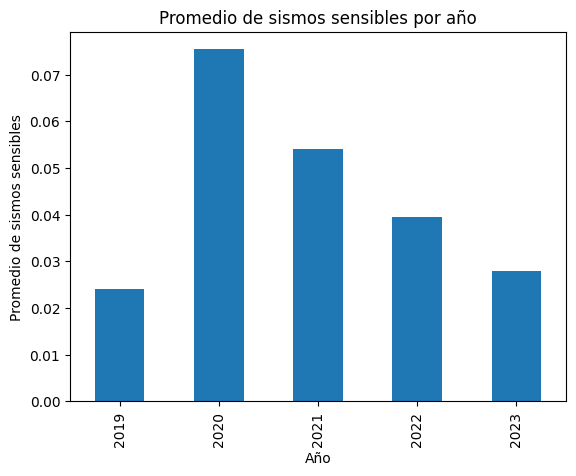

Menú:
1. Promedio de magnitud y profundidad de los sismos por mes
2. Promedio de sismos sensibles por año
3. Sismos con error mayor a 25kms por año
4. Información del sismo con la menor cantidad de fases
5. Salir


Seleccione una opción:  3


KeyError: 'Id'

In [14]:
def menu():
    print("Menú:")
    print("1. Promedio de magnitud y profundidad de los sismos por mes")
    print("2. Promedio de sismos sensibles por año")
    print("3. Sismos con error mayor a 25kms por año")
    print("4. Información del sismo con la menor cantidad de fases")
    print("5. ")
    print("5. Salir")
    
opcion = None
while opcion != '5':
    menu()
    opcion = input("Seleccione una opción: ")

    if opcion == '1':
        promedio_magnitud_profundidad_por_mes()
    elif opcion == '2':
        sismos_sensibles_promedio_por_anio()
    elif opcion == '3':
        sismos_con_error_mayor_a_25kms()
    elif opcion == '4':
        sismo_menor_cantidad_fases()
    elif opcion == '5':
        print("¡Hasta luego!")
    else:
        print("Opción no válida. Por favor, seleccione una opción válida.")
